# TP EPITA - 1. Clustering

Ce notebook contient notre code pour le TP de Kantar. Notre groupe est constitué de :
- Alexandre Devaux-Rivière
- Valentin San
- Maël Reynaud


---

### Imports

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots
from utils import get_summary

pd.set_option("display.max_columns", None)

%matplotlib inline

### Clusterisation des 5000 individus en utilisant les variables A9 A10 et A11

---

In [139]:
df_codes = pd.read_csv('../data/fic_epita_kantar_codes.csv', delimiter=';')
df_codes

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,A8_1_slice,A8_2_slice,A8_3_slice,A8_4_slice,B1_1_slice,B1_2_slice,B2_1_slice,B2_2_slice,B3,B4,B6,C1_1_slice,C1_2_slice,C1_3_slice,C1_4_slice,C1_5_slice,C1_6_slice,C1_7_slice,C1_8_slice,C1_9_slice,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,A1bis,A2,A6_1_slice,A6_2_slice,A6_3_slice,A6_4_slice,A6_5_slice,A6_6_slice,A7,B5_1_slice,B5_2_slice,B5_3_slice,B5_4_slice,B5_5_slice,B5_6_slice,C201,C202,C203,C204,C205,C206,C207,C208,C209,C210,C211,C212,C213,C214,C215,C216,C217,C218,C219,C220,C301,C302,C303,C304,C305,C306,C307,C308,C309,C310,C311,C4_1_slice,C4_2_slice,C4_3_slice,C4_4_slice,rs3,rs5,rs6,RS1,RS191,RS192,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,2,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,100,0,0,0,0.0,0,45,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,2,2,1,1,5.0,1,1.0,2,2,4,1,2,NaN,1,1,24,0,4
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,2,0,0,0,2,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,100,0,0,0,0.0,0,1,3,3,3,3,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,2,2,1,1,2.0,1,1.0,2,2,1,1,2,NaN,4,1,50,0,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,5,5,1,1,2,2,2,3,3,3,4,4,4,4,4,4,4,4,4,4,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,80,0,5,5,0.0,10,5,3,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,7,7,1,1,9.0,2,1.0,1,2,3,2,1,NaN,3,2,37,1,3
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,2,3,2,1,4,3,4,3,3,4,4,4,4,5,5,5,5,5,4,4,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2,1,1,30,5,25,15,20.0,5,25,3,4,4,4,4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,7,7,7,2,3,NaN,2,1.0,2,2,2,1,2,NaN,5,3,63,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,1,1,1,1,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,5,0.0,95,1,4,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,1,1,6.0,1,2.0,2,2,3,2,1,NaN,3,1,44,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,MET20_779605,0.905997,1,0,1,0,3,NaN,1.0,5,6,5,1,4,4,4,4,4,4,4,4,4,5,5,5,5,5,4,5,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1,3,1,10,0,50,20,NaN,20,5,3,4,4,3,2,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7,7,7,1,3,NaN,2,1.0,2,2,2,1,2,NaN,6,3,69,0,2
4996,4997,MET20_80000348,1.257884,0,1,0,0,2,NaN,1.0,1,3,1,0,4,4,4,4,3,4,2,4,5,5,5,5,5,5,5,5,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4,2,1,0,0,50,0,0.0,50,0,3,4,4,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,7,7,7,1,7,NaN,2,2.0,1,2,1,1,2,NaN,4,3,53,0,1
4997,4998,MET20_288029,1.094695,0,1

On se restreint seulement aux variables A9, A10 et A11 (variables oranges).

In [140]:
orange_variables = df_codes.filter(regex=("(weight|A9|A10|A11).*"))
orange_features = orange_variables.columns
orange_variables

,weight,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,2.501255,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,0.722914,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1.039611,1,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,0.976590,1,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2
4,0.812315,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.905997,1,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1
4996,1.257884,0,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4
4997,1.094695,0,3,4,4,3,2,2,4,4,3,3,2,4,3,3,3,4,2,2,2,2,2,2,2,2,2,3,3,3,2,3,3,3,2,3,3,2,3
4998,2.022023,0,3,3,4,3,3,2,3,3,2,2,2,4,4,3,3,4,2,2,3,2,2,3,2,2,2,2,2,3,3,2,3,2,3,2,2,1,3


## Etude de la distribution des valeurs dans notre tablea "orange"

On sauvergade les données pour de potentielles exploitations futures.

In [141]:
orange_variables.to_csv('../data/orange_var_file.csv', sep=';')

Etudions maintenant la distribution des données.

In [142]:
get_summary(orange_variables).style.background_gradient(cmap='viridis_r', low=0.8)

,dtype,unique,missing,duplicates,min,max,avg,std dev
weight,float64,169,0,7,0.379603,5.969742,0.968387,0.434649
A11,int64,2,0,7,0.000000,1.000000,0.781800,0.413065
A9_1_slice,int64,4,0,7,1.000000,4.000000,2.209800,0.794676
A9_2_slice,int64,4,0,7,1.000000,4.000000,2.698800,0.843458
A9_3_slice,int64,4,0,7,1.000000,4.000000,2.662000,0.865047
A9_4_slice,int64,4,0,7,1.000000,4.000000,2.602800,0.870163
A9_5_slice,int64,4,0,7,1.000000,4.000000,2.683800,0.832800
A9_6_slice,int64,4,0,7,1.000000,4.000000,2.208000,0.752628
A9_7_slice,int64,4,0,7,1.000000,4.000000,2.488800,1.048663
A9_8_slice,int64,4,0,7,1.000000,4.000000,2.424400,0.852778


On remarque qu'il n'y a pas de valeurs manquantes (dont pas besoin de les remplacer) et qu'elles sont toutes dans l'intervale [0-4] correspondant aux valeurs possibles dans un QCM à 4 choix possibles pour chaque question, ce qui signifie qu'on a déjà une donnée propre et exploitable.

## Choix du nombre de groupes

Séparons les poids de notre table de données, ceux-ci nous serons utiles lors de la séparation de la donnée en clusters pour accorder plus ou moins d'importance à chaque échantillon.

In [143]:
weights = orange_variables['weight'].values

print("shape:", weights.shape)
weights

shape: (5000,)


array([2.50125479, 0.72291398, 1.0396114 , ..., 1.09469527, 2.02202279,
       0.9463952 ])

In [144]:
orange_variables = orange_variables.drop(columns=["weight"])
orange_variables

,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2
4,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1
4996,0,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4
4997,0,3,4,4,3,2,2,4,4,3,3,2,4,3,3,3,4,2,2,2,2,2,2,2,2,2,3,3,3,2,3,3,3,2,3,3,2,3
4998,0,3,3,4,3,3,2,3,3,2,2,2,4,4,3,3,4,2,2,3,2,2,3,2,2,2,2,2,3,3,2,3,2,3,2,2,1,3


#### Préparation de la donnée

Dans un premier temps, nous allons normaliser la donnée avec *StandardScaler()* puis utiliser la **"Silhouette score"** (qui mesure à quel point les données sont dans le bon cluster) et le **"Calinski-Harabasz score"** (qui mesure la séparation des clusters) pour évaluer les différentes tailles de clusters (allant de 2 à 12).

In [145]:
def clustering_analysis(X: pd.DataFrame, weights: np.ndarray):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # elbow method analysis
    print("Calculating clustering metrics for different numbers of clusters:")
    for nb_clusters in range(2, 12):
        kmeans = KMeans(n_clusters=nb_clusters, random_state=1)
        labels = kmeans.fit_predict(X_scaled, sample_weight=weights)
        s_score = silhouette_score(X_scaled, labels, metric='euclidean')
        ch_score = calinski_harabasz_score(X_scaled, labels)
        print(f"{nb_clusters} clusters - Silhouette score : {s_score:.4f} ; Calinski-Harabasz score : {ch_score:.4f}")

    # elbow curve visualize
    plt.figure(figsize=(10, 6))
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2, 12))
    visualizer.fit(X_scaled)
    visualizer.show()

    return X_scaled

Calculating clustering metrics for different numbers of clusters:
2 clusters - Silhouette score : 0.1905 ; Calinski-Harabasz score : 1510.7251
3 clusters - Silhouette score : 0.1473 ; Calinski-Harabasz score : 1145.7704
4 clusters - Silhouette score : 0.1084 ; Calinski-Harabasz score : 890.7230
5 clusters - Silhouette score : 0.0823 ; Calinski-Harabasz score : 727.3910
6 clusters - Silhouette score : 0.0737 ; Calinski-Harabasz score : 630.5580
7 clusters - Silhouette score : 0.0638 ; Calinski-Harabasz score : 547.7796
8 clusters - Silhouette score : 0.0565 ; Calinski-Harabasz score : 494.9089
9 clusters - Silhouette score : 0.0513 ; Calinski-Harabasz score : 448.5408
10 clusters - Silhouette score : 0.0484 ; Calinski-Harabasz score : 409.0490
11 clusters - Silhouette score : 0.0454 ; Calinski-Harabasz score : 377.9394


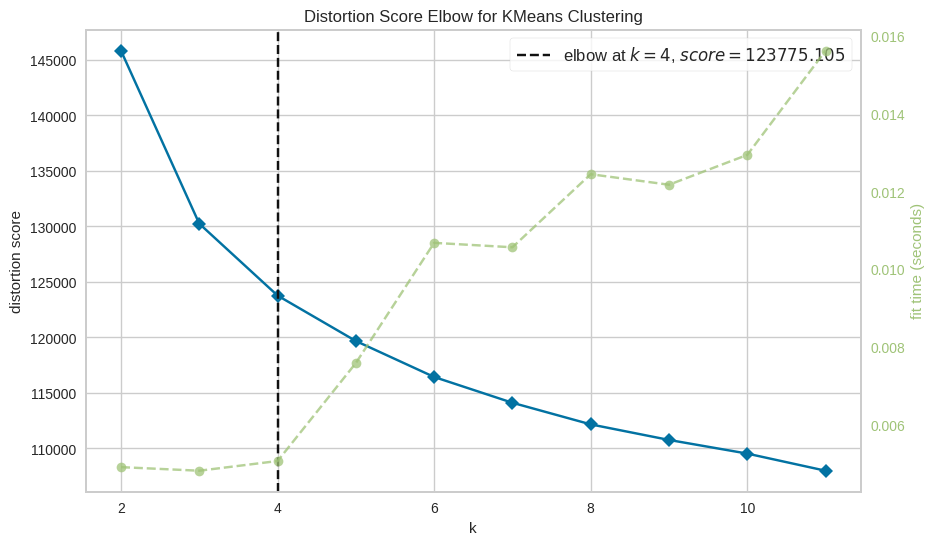

In [146]:
X_scaled = clustering_analysis(orange_variables, weights)

> TODO:

Les résultats obtenus avec ces 3 méthodes sont assez intéressants. La méthode **Elbow** a l'air d'indiquer un résultat optimal avec 4 clusters, alors que le **silhouette score** indique un meilleur résultat à 2 clusters, et le **Calinski-Harabasz score** à 8 clusters. Ceci est dû au fait que ce sont des heuristiques, donc le résultat peut beaucoup varier entre les différentes méthodes.

Afin de comparer nos résultats, utilisons la méthode du dendrogramme.

Nous allons, de ce fait, définir la matrice de distances pondérée par les poids des individus pour la construction de notre dendrogramme (avec scipy).

In [147]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import euclidean, squareform
from tqdm import tqdm

In [148]:
def weighted_distance_matrix(X_scaled: pd.DataFrame, weights: np.ndarray):
    n_samples = X_scaled.shape[0]
    distance_matrix = np.zeros((n_samples, n_samples))

    for i in tqdm(range(n_samples)):
        for j in range(i + 1, n_samples):
            distance = euclidean(X_scaled[i] * weights[i], X_scaled[j] * weights[j])
            distance_matrix[i, j], distance_matrix[j, i] = distance, distance
    return distance_matrix

In [149]:
weighted_distances = weighted_distance_matrix(X_scaled, weights)
weighted_distances

100%|██████████| 5000/5000 [02:04<00:00, 40.25it/s] 


array([[ 0.        ,  4.28653814,  6.50299903, ..., 11.64060163,
        15.56420388,  9.23019567],
       [ 4.28653814,  0.        ,  6.18268346, ..., 10.91300973,
        14.58732452,  8.95627407],
       [ 6.50299903,  6.18268346,  0.        , ...,  8.35421506,
        11.240677  ,  5.27560774],
       ...,
       [11.64060163, 10.91300973,  8.35421506, ...,  0.        ,
         8.507338  ,  6.27573192],
       [15.56420388, 14.58732452, 11.240677  , ...,  8.507338  ,
         0.        ,  9.63435417],
       [ 9.23019567,  8.95627407,  5.27560774, ...,  6.27573192,
         9.63435417,  0.        ]])

In [150]:
condensed_weighted_distances = squareform(weighted_distances)
condensed_weighted_distances

array([4.28653814, 6.50299903, 8.1671457 , ..., 8.507338  , 6.27573192,
       9.63435417])

Now we perform hierarchical/agglomerative clustering.

In [151]:
Z = linkage(condensed_weighted_distances, method='ward')
Z

array([[2.16400000e+03, 2.20600000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.22700000e+03, 2.60300000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.77000000e+02, 4.41000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.98500000e+03, 9.99300000e+03, 1.35185220e+02, 2.95600000e+03],
       [9.99400000e+03, 9.99600000e+03, 1.91351773e+02, 3.08700000e+03],
       [9.99500000e+03, 9.99700000e+03, 2.74597458e+02, 5.00000000e+03]])

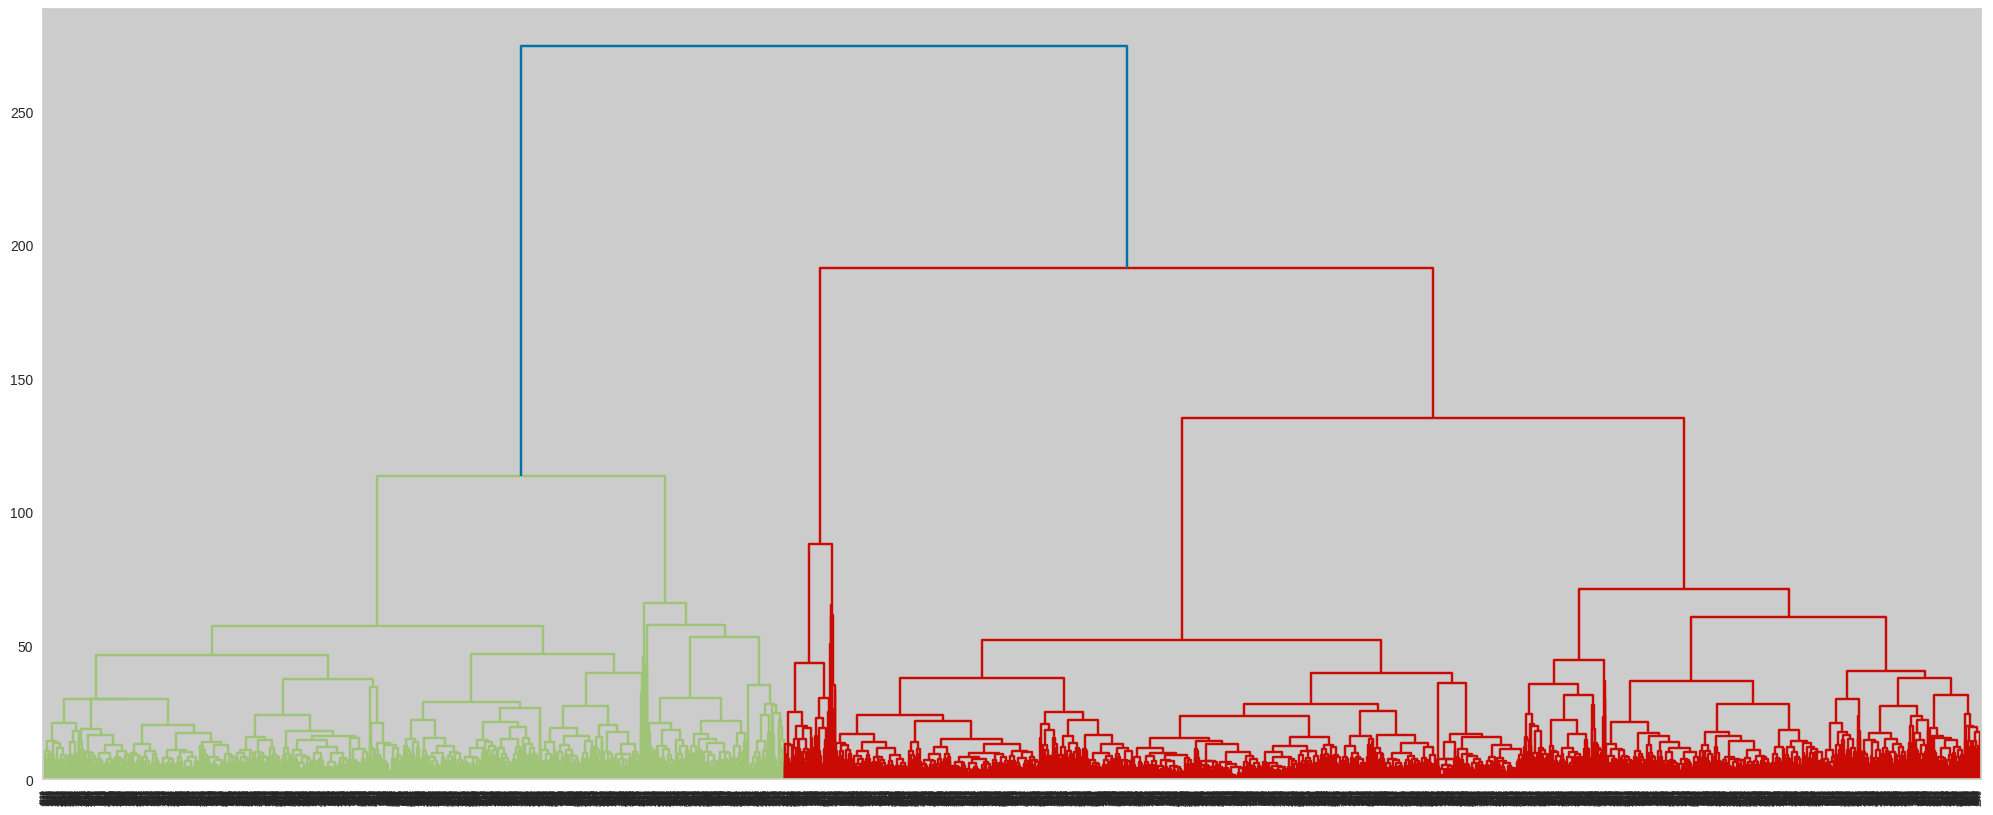

In [152]:
plt.figure(figsize=(25, 10))
dendrogram(Z, orientation='top')
plt.show()

In [153]:
nb_cluster = 4

> TODO: explication + découpe dans le dendrogramme

On va choisir un nombre de clusters de 4.

Après étude, nous avons vu que le meilleur nombre clusters à utiliser dans notre cas est 4. Assignons donc à chaque sample de notre dataset son cluster (avec KMeans).

In [154]:
kmeans = KMeans(n_clusters=nb_cluster, random_state=1)
kmeans.fit(X_scaled, sample_weight=weights)

KMeans(n_clusters=4, random_state=1)

In [155]:
orange_variables['cluster'] = kmeans.labels_
orange_variables

,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice,cluster
0,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1
2,1,3,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
3,1,1,2,2,2,3,2,3,2,1,2,1,3,3,1,2,3,2,2,3,2,2,3,2,3,2,2,1,2,1,2,3,3,3,2,2,1,2,0
4,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,2,3,4,3,2,2,2,1,2,1,3,4,1,2,2,1,1,3,1,1,4,1,2,1,1,1,2,1,2,1,1,1,1,1,1,1,1
4996,0,2,3,4,3,3,2,4,2,3,2,1,2,3,2,2,3,1,2,3,2,1,3,3,3,3,2,2,2,2,3,2,2,2,2,3,2,4,3
4997,0,3,4,4,3,2,2,4,4,3,3,2,4,3,3,3,4,2,2,2,2,2,2,2,2,2,3,3,3,2,3,3,3,2,3,3,2,3,3
4998,0,3,3,4,3,3,2,3,3,2,2,2,4,4,3,3,4,2,2,3,2,2,3,2,2,2,2,2,3,3,2,3,2,3,2,2,1,3,3


In [156]:
orange_variables.to_csv('../data/orange_with_labels.csv', sep=';')

Regardons maintenant la distrubution du nombre de points par cluster et étudions les variances inter et intra clusters.

In [67]:
def describe_cluster_variances():
    for cluster in orange_variables['cluster'].unique():
        nb_points = len(orange_variables[orange_variables['cluster'] == cluster])
        print(f"Cluster {cluster}: {nb_points} points")

    cluster_grouped = orange_variables.groupby('cluster')

    print("\n=== Variance intra-cluster ===")
    display(cluster_grouped.var())

    print("=== Variance inter-cluster ===")
    variance_inter_cluster = cluster_grouped.mean().var().reset_index()
    variance_inter_cluster.columns = ["Feature", "Variance"]
    display(variance_inter_cluster.T)

In [68]:
describe_cluster_variances()

Cluster 0: 2116 points
Cluster 1: 1149 points
Cluster 3: 1419 points
Cluster 2: 316 points

=== Variance intra-cluster ===


,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.140942,0.288599,0.439590,0.439056,0.445390,0.567003,0.375007,0.791669,0.370804,0.418890,0.367661,0.339480,0.417287,0.657892,0.289315,0.355495,0.561017,0.227670,0.275321,0.393442,0.242469,0.214564,0.440221,0.297414,0.624128,0.244461,0.210884,0.228894,0.363582,0.214290,0.342607,0.232523,0.277893,0.306797,0.213065,0.268834,0.279209,0.387218
1,0.097039,0.333726,0.580091,0.623540,0.555055,0.884014,0.612623,0.768097,0.431364,0.426349,0.436227,0.235357,0.641176,0.913838,0.263245,0.430270,0.681291,0.162577,0.294995,0.697351,0.379192,0.158429,0.896177,0.444357,0.648516,0.241483,0.243076,0.161689,0.307491,0.154299,0.250280,0.180772,0.245922,0.378564,0.193572,0.311980,0.233440,0.346126
2,0.241139,0.474101,0.270555,0.228360,0.205465,0.900141,0.901226,0.409122,0.302863,0.847418,0.434911,0.716576,0.264125,0.281656,0.400914,0.474774,0.462236,0.710307,0.896715,0.748031,0.604501,0.711865,0.934539,0.660559,0.635403,0.532811,0.563261,0.512276,0.641511,0.463613,0.832309,0.437372,0.350683,0.320625,0.487965,0.357916,0.525809,0.376964
3,0.207947,0.472276,0.384818,0.371682,0.407182,0.642003,0.510283,0.713696,0.428701,0.699899,0.501744,0.589983,0.353981,0.516776,0.468520,0.496210,0.587784,0.208737,0.286487,0.408795,0.386747,0.198585,0.487102,0.430622,0.717031,0.348185,0.339547,0.338634,0.453448,0.316419,0.442988,0.352405,0.399202,0.397503,0.372807,0.440629,0.483292,0.557816


=== Variance inter-cluster ===


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
Feature,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
Variance,0.047412,0.640656,0.553634,0.617571,0.674459,0.033055,0.213134,0.743672,0.742333,0.454714,0.58982,0.715733,0.403888,0.539442,0.792587,0.569459,0.532417,0.41611,0.225263,0.046918,0.425572,0.410948,0.046376,0.454789,0.543976,0.640075,0.600205,0.72413,0.589726,0.789088,0.46455,0.79182,0.812762,0.6867,0.792047,0.763968,0.716182,0.854229


#### Visualisation

Définition d'une fonction d'affichage des clusters en 3D avec nos 4 clusters représenté par des couleurs différentes.

> TODO revoir explication

Les données étant normalisées, on obtient directement le ratio variance intro groupe / inter groupe en calculant la variance de chaque colonne dans chaque cluster. On remarque dans les clusters 1 et 2 une variance très basse, ce qui est bon signe, car cela signifie que les données se ressemble beaucoup. Dans le cluster 1, la variance est un peu plus élevé, et dans le dernier cluster, on remarque des variances très hautes. On peut interpréter ce dernier cluster comme un "fourre tout".

# Clustering avec PCA

On va réduire la dimensionnalité de nos données avec PCA avant le clustering.

In [136]:
def pca_analysis(X: pd.DataFrame):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    df_pca = pd.DataFrame(data=X_pca, columns=["PCA1", "PCA2", "PCA3"])
    print(f"PCA explained variance: {pca.explained_variance_ratio_}\n")

    return df_pca, pca

In [118]:
df_pca, pca = pca_analysis(orange_variables)

PCA explained variance: [0.38303679 0.0679994  0.04693093]



### Visualization

In [119]:
def visualize_pca_clusters(df_pca: pd.DataFrame, n_clusters: int):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    labels = kmeans.fit_predict(df_pca)

    # 2 rows and 2 columns subplot
    fig = make_subplots(
        rows=2, cols=2,
        specs=[
            [{'type': 'scatter3d'}, {'type': 'scatter'}],
            [{'type': 'scatter'}, {'type': 'scatter'}]
        ],
        subplot_titles=(
            '3D PCA plot (PC1 vs PC2 vs PC3)',
            '2D PCA plot (PC1 vs PC2)',
            '2D PCA plot (PC1 vs PC3)',
            '2D PCA plot (PC2 vs PC3)'
        )
    )

    # 3D plot
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter3d(
                x=df_pca["PCA1"][mask],
                y=df_pca["PCA2"][mask],
                z=df_pca["PCA3"][mask],
                mode='markers',
                name=f'Cluster {i}',
                showlegend=True,
                hovertemplate=(
                    'PC1: %{x:.2f}<br>' +
                    'PC2: %{y:.2f}<br>' +
                    'PC3: %{z:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=1, col=1
        )

    fig.update_scenes(
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.2, y=1.2, z=1.2)
        )
    )

    # PC1 vs PC2
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter(
                x=df_pca["PCA1"][mask],
                y=df_pca["PCA2"][mask],
                mode='markers',
                name=f'Cluster {i}',
                showlegend=False,
                hovertemplate=(
                    'PC1: %{x:.2f}<br>' +
                    'PC2: %{y:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=1, col=2
        )

    # PC1 vs PC3
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter(
                x=df_pca["PCA1"][mask],
                y=df_pca["PCA3"][mask],
                mode='markers',
                name=f'Cluster {i}',
                showlegend=False,
                hovertemplate=(
                    'PC1: %{x:.2f}<br>' +
                    'PC3: %{z:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=2, col=1
        )

    # PC2 vs PC3
    for i in range(n_clusters):
        mask = labels == i
        fig.add_trace(
            go.Scatter(
                x=df_pca["PCA2"][mask],
                y=df_pca["PCA3"][mask],
                mode='markers',

                name=f'Cluster {i}',
                showlegend=False,
                hovertemplate=(
                    'PC2: %{x:.2f}<br>' +
                    'PC3: %{y:.2f}<br>' +
                    '<extra></extra>'
                ),
            ),
            row=2, col=2
        )

    fig.update_layout(
        title=f'PCA visualization with {n_clusters} clusters<br>',
        height=1000,
        width=1200,
        showlegend=True,
    )

    fig.update_xaxes(title_text="PC1", row=1, col=2)
    fig.update_yaxes(title_text="PC2", row=1, col=2)
    fig.update_xaxes(title_text="PC1", row=2, col=1)
    fig.update_yaxes(title_text="PC3", row=2, col=1)
    fig.update_xaxes(title_text="PC2", row=2, col=2)
    fig.update_yaxes(title_text="PC3", row=2, col=2)

    return fig, labels

In [122]:
fig, labels = visualize_pca_clusters(df_pca=df_pca, n_clusters=nb_cluster)
fig.show()

Nous cherchons à présent à décortiquer les composantes principales pour savoir les features princpales entrant en jeux dans la construction de cette réduction de dimensionalité.

In [130]:
pca_components = pd.DataFrame(pca.components_, columns=orange_features, index=['PC1', 'PC2', 'PC3'])
pca_components

,weight,A11,A9_1_slice,A9_2_slice,A9_3_slice,A9_4_slice,A9_5_slice,A9_6_slice,A9_7_slice,A9_8_slice,A9_9_slice,A9_10_slice,A9_11_slice,A9_12_slice,A9_13_slice,A9_14_slice,A9_15_slice,A9_16_slice,A10_1_slice,A10_2_slice,A10_3_slice,A10_4_slice,A10_5_slice,A10_6_slice,A10_7_slice,A10_8_slice,A11_1_slice,A11_2_slice,A11_3_slice,A11_4_slice,A11_5_slice,A11_6_slice,A11_7_slice,A11_8_slice,A11_9_slice,A11_10_slice,A11_11_slice,A11_12_slice,A11_13_slice
PC1,0.011954,-0.071626,0.177354,0.169206,0.172059,0.175653,0.038042,0.095303,0.153130,0.183722,0.138237,0.170443,0.174770,0.152733,0.148167,0.187276,0.167585,0.152002,0.170827,0.126245,0.062750,0.156190,0.173236,-0.047157,0.156922,0.141435,0.179594,0.182651,0.194145,0.166986,0.199497,0.149555,0.196691,0.196274,0.182409,0.198635,0.191726,0.180275,0.182573
PC2,0.023335,0.050862,0.218113,0.283857,0.303545,0.282375,0.019163,-0.041032,0.048031,0.224709,0.077487,0.224877,0.073112,0.272961,0.264199,0.037613,0.231193,0.132057,-0.143122,-0.077166,-0.050411,-0.136253,-0.126079,0.021688,0.007128,-0.088867,-0.202668,-0.185178,-0.164431,-0.137103,-0.164935,-0.200748,-0.151952,-0.135648,-0.118106,-0.089911,-0.085257,-0.124959,-0.128422
PC3,-0.103732,-0.089842,-0.171780,-0.018988,0.006528,0.023589,0.315446,0.129563,0.340028,-0.069612,0.138252,-0.058348,-0.008850,-0.047264,0.097306,-0.138598,-0.200235,0.205994,-0.031342,-0.145903,0.347745,0.025402,-0.143436,0.242375,-0.095955,0.378353,-0.136050,-0.128329,-0.105732,-0.145260,-0.086911,-0.143830,-0.011115,-0.055809,0.082108,0.016378,0.148143,0.123691,0.243710


In [132]:
for pc in ['PC1', 'PC2', 'PC3']:
    print(f"\n{pc} top 4 contributors:")
    print(pca_components.loc[pc].abs().nlargest(4))


PC1 top 4 contributors:
A11_5_slice     0.199497
A11_10_slice    0.198635
A11_7_slice     0.196691
A11_8_slice     0.196274
Name: PC1, dtype: float64

PC2 top 4 contributors:
A9_3_slice     0.303545
A9_2_slice     0.283857
A9_4_slice     0.282375
A9_12_slice    0.272961
Name: PC2, dtype: float64

PC3 top 4 contributors:
A10_8_slice    0.378353
A10_3_slice    0.347745
A9_7_slice     0.340028
A9_5_slice     0.315446
Name: PC3, dtype: float64


In [135]:
df_pca["cluster"] = labels
for i in range(nb_cluster):
    clu = df_pca[df_pca["cluster"] == i]
    clu_cpy = clu.copy().drop(columns=["cluster"])
    df_pca_cpy = df_pca.copy().drop(columns=["cluster"])

    print(f"Ratio: (variance intra cluster {i} / inter cluster)")
    print(clu_cpy.var() / df_pca_cpy.var(), end="\n\n")

Ratio: (variance intra cluster 0 / inter cluster)
PCA1    0.116090
PCA2    1.067137
PCA3    1.064244
dtype: float64

Ratio: (variance intra cluster 1 / inter cluster)
PCA1    0.159879
PCA2    0.967468
PCA3    1.105817
dtype: float64

Ratio: (variance intra cluster 2 / inter cluster)
PCA1    0.393424
PCA2    0.955609
PCA3    0.931571
dtype: float64

Ratio: (variance intra cluster 3 / inter cluster)
PCA1    0.079511
PCA2    0.795042
PCA3    0.889443
dtype: float64



Despite some overlap, the clusters are reasonably well separated, supporting the choice of 4 clusters as optimal.

**Conclusion: In this study, we found that the optimal clustering for orange values is 4!**

### Clusterisation des 5000 individus en utilisant les variables en verte

## 2. Réaffectation des individus dans les groupes avec variables actives

## 3. Réaffectation des individus dans les groupes avec variables illustratives